# Modifying Qiskit Nature website's example

https://qiskit-community.github.io/qiskit-nature/getting_started.html

$H_2$ molecule...

Analysis below. Here the initial code:

In [ ]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver

# Use PySCF, a classical computational chemistry software
# package, to compute the one-body and two-body integrals in
# electronic-orbital basis, necessary to form the Fermionic operator
driver = PySCFDriver(
    atom='H .0 .0 .0; H .0 .0 0.735',
    unit=DistanceUnit.ANGSTROM,
    basis='sto3g',
)
problem = driver.run()

# setup the qubit mapper
from qiskit_nature.second_q.mappers import ParityMapper

mapper = ParityMapper(num_particles=problem.num_particles)


# setup the classical optimizer for the VQE
from qiskit_algorithms.optimizers import L_BFGS_B

optimizer = L_BFGS_B()

# setup the ansatz for VQE
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD

ansatz = UCCSD(
    problem.num_spatial_orbitals,
    problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        problem.num_spatial_orbitals,
        problem.num_particles,
        mapper,
    ),
)

# setup the estimator primitive for the VQE
from qiskit.primitives import Estimator

estimator = Estimator()

# set up our actual VQE instance
from qiskit_algorithms import VQE

vqe = VQE(estimator, ansatz, optimizer)
# ensure that the optimizer starts in the all-zero state which corresponds to
# the Hartree-Fock starting point
vqe.initial_point = [0] * ansatz.num_parameters

# prepare the ground-state solver and run it
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

algorithm = GroundStateEigensolver(mapper, vqe)

electronic_structure_result = algorithm.solve(problem)
electronic_structure_result.formatting_precision = 6
print(electronic_structure_result)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.857275
  - computed part:      -1.857275
~ Nuclear repulsion energy (Hartree): 0.719969
> Total ground state energy (Hartree): -1.137306
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  1.388949]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  1.388949]
    - computed part:      [0.0  0.0  1.388949]
  > Dipole moment (a.u.): [0.0  0.0  0.0]  Total: 0.0
                 (debye): [0.0  0.0  0.0]  Total: 0.0
 


/tmp/ipykernel_6915/2455995582.py:41: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


# What's the Hamiltonian here?

In [1]:
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.mappers import ParityMapper


driver = PySCFDriver(
    atom='H .0 .0 .0; H .0 .0 0.735',
    unit=DistanceUnit.ANGSTROM,
    basis='sto3g',
)
problem = driver.run()

# Get the fermionic Hamiltonian (Hatree-Fock approximation, STO-3G, fermionic creation and annihilation, hopping-occupation-interaction, etc.)
fermionic_hamiltonian = problem.hamiltonian.second_q_op()
print("FERMIONIC HAMILTONIAN: \n")
print(fermionic_hamiltonian)

# Convert the fermionic Hamiltonian to a qubit Hamiltonian (Parity mapping, could be Jordan-Wigner or Bravyi-Kitaev)
mapper = ParityMapper(num_particles=problem.num_particles)
qubit_hamiltonian = mapper.map(problem.hamiltonian.second_q_op())
print("\n\nQUBIT HAMILTONIAN: \n")
print(qubit_hamiltonian)

FERMIONIC HAMILTONIAN: 

Fermionic Operator
number spin orbitals=4, number terms=36
  0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.3322908651276482 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.3322908651276482 * ( +_0 +_3 -_3 -_0 )
+ 0.09046559989211572 * ( +_0 +_0 -_1 -_1 )
+ 0.09046559989211572 * ( +_0 +_1 -_0 -_1 )
+ 0.09046559989211572 * ( +_0 +_2 -_3 -_1 )
+ 0.09046559989211572 * ( +_0 +_3 -_2 -_1 )
+ 0.09046559989211572 * ( +_1 +_0 -_1 -_0 )
+ 0.09046559989211572 * ( +_1 +_1 -_0 -_0 )
+ 0.09046559989211572 * ( +_1 +_2 -_3 -_0 )
+ 0.09046559989211572 * ( +_1 +_3 -_2 -_0 )
+ 0.3322908651276482 * ( +_1 +_0 -_0 -_1 )
+ 0.34928686136600884 * ( +_1 +_1 -_1 -_1 )
+ 0.3322908651276482 * ( +_1 +_2 -_2 -_1 )
+ 0.34928686136600884 * ( +_1 +_3 -_3 -_1 )
+ 0.33785507740175813 * ( +_2 +_0 -_0 -_2 )
+ 0.3322908651276482 * ( +_2 +_1 -_1 -_2 )
+ 0.33785507740175813 * ( +_2 +_2 -_2 -_2 )
+ 0.3322908651276482 * ( +_2 +_3 -_3 -_2 )
+ 0.09046559989211572 * ( +_2 +_0 -_1 -_3 

## What are the eigenvalues?

Ground state energy of $H_2$ is found to be −1.1744 Hartree.

With VQE above finds: -1.37306 Hartree. The smallest eigenvalue is found -1.857275 - this is electronic ground state energy. After adding nuclear repulsion energy it gets -1.37306.

Calculating classically: we find the smallest eigenvalue -1.8572750302034788 which is correct. But where does the nuclear repulsion energy come from?

In [6]:
import numpy as np

# Using classical algorithm

eigvals, eigvecs = np.linalg.eigh(qubit_hamiltonian.to_matrix())

print("Matrix:")
print(qubit_hamiltonian.to_matrix())

print("\nSmallest eigenvalue:", np.min(eigvals))

Matrix:
[[-1.06365335+0.j  0.        +0.j  0.        +0.j  0.1809312 +0.j]
 [ 0.        +0.j -1.83696799+0.j  0.1809312 +0.j  0.        +0.j]
 [ 0.        +0.j  0.1809312 +0.j -0.24521829+0.j  0.        +0.j]
 [ 0.1809312 +0.j  0.        +0.j  0.        +0.j -1.06365335+0.j]]

Smallest eigenvalue: -1.8572750302023788


# The whole process

Because of Rayleigh-Ritz principle it doesn't matter what states we are generating with parameterized ansatz, as long as optimizing the parameters gives us a converging expval of given hamiltonian. And the hamiltonian itself already has all the molecule energy info. So we just need to "guess" the state that would yield the lowest energy, when hamiltonian applied. And that "guess work" process doesnt matter, as long as the expval converges. 

But we want it to converge. And we want it to be fast. So we need to carefully choose the ansatz. 

For chemistry problems the default ansatz is UCCSD (Unitary Coupled Cluster with Simples and Doubles). After that we can modify it and reduce circuit depth (if it's hard to train) or increase complexity (if it doesn't converge).

Classical optimizer also doesn't matter, as long as it does the convergence work and is fast enough. Default choice would be L-BFGS-B (extension of L-BFGS, limited-memory BFGS).

# Classical optimizer (L-BFGS-B)

More on this: https://sepwww.stanford.edu/data/media/public/docs/sep117/antoine1/paper_html/node6.html

With paper: [Algorithm 778: L-BFGS-B: Fortran subroutines for large-scale bound-constrained optimization](https://dl.acm.org/doi/10.1145/279232.279236)

Optimal value: 1.329683522486451e-15
Optimal point: [3.00000004]


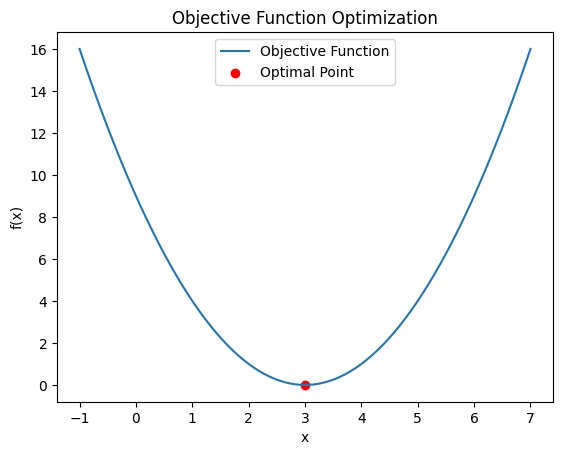

In [100]:
from qiskit_algorithms.optimizers import L_BFGS_B
import numpy as np

optimizer = L_BFGS_B()

import matplotlib.pyplot as plt

# Example function to minimize
def objective_function(x):
    return (x - 3) ** 2

result = optimizer.minimize(fun=objective_function, x0=[0])
print("Optimal value:", result.fun)
print("Optimal point:", result.x)

# Plotting the objective function
x = np.linspace(-1, 7, 400)
y = objective_function(x)
plt.plot(x, y, label='Objective Function')
plt.scatter(result.x, result.fun, color='red', label='Optimal Point')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Objective Function Optimization')
plt.show()

# Ansatz UCCSD with HF start

Number of spatial orbitals:  2
Number of particles:  (1, 1)

Full Ansatz in Pauli Representation:
SparsePauliOp(['IY', 'YI', 'XY', 'YX'],
              coeffs=[ 1. +0.j, -1. +0.j, -0.5+0.j,  0.5+0.j])


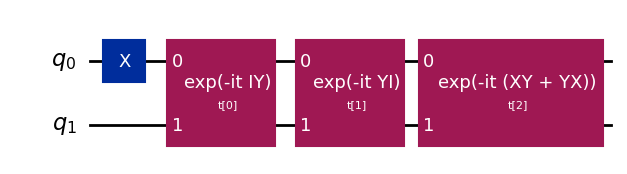

In [101]:
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD
from qiskit.visualization import circuit_drawer

# Places electrons in the lowest energy orbitals, i.e. 1100 (q1 -> (0, ↑), q2 -> (0, ↓), q3 -> (1, ↑), q4 -> (1, ↓))
initial_state = HartreeFock(
        problem.num_spatial_orbitals, # 2
        problem.num_particles, # (1, 1)
        mapper, # ParityMapper
    )

ansatz = UCCSD(
    problem.num_spatial_orbitals, # 2
    problem.num_particles, # (1, 1)
    mapper, # ParityMapper
    initial_state=initial_state, # 1100
)

print("Number of spatial orbitals: ", problem.num_spatial_orbitals)
print("Number of particles: ", problem.num_particles)

# Convert full ansatz circuit to Pauli form
fermionic_excitation_ops = ansatz.excitation_ops()
qubit_excitation_ops = [mapper.map(op) for op in fermionic_excitation_ops]
full_pauli_ansatz = sum(qubit_excitation_ops)
print("\nFull Ansatz in Pauli Representation:")
print(full_pauli_ansatz)

# Display the ansatz in graphics
circuit_drawer(ansatz.decompose(), output='mpl')




## Decomposing unitary evolution gates

> NEED TO FULLY UNDERSTAND YET... and fix errors

Pauli matrix in exponent:

$e^{-itY} = R_Y(2t) = I \cos t - iH\sin t = \begin{bmatrix}\cos t & -\sin t \\ \sin t & \cos t \end{bmatrix}$.

Pauli composition in exponent:

$e^{-it(XY + YX)} = e^{-it(XX + YY -i[XY, YX])} = e^{-it(XX + YY)}$, since $[XY, YX]=0$, and then we get (somehow by magic) $H_0H_1$, $CNOT$, $R_{Z_1}$, $H_0H_1$.


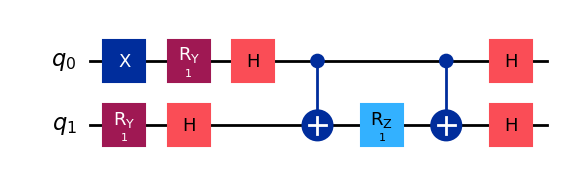

In [102]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import RYGate, RZGate

t = 0.5  # Example parameter

qc = QuantumCircuit(2)

# Step 1: X gate on q0 to initialize state
qc.x(0)

# Step 2: Single-qubit exponentials
qc.ry(2*t, 0)
qc.ry(2*t, 1)

# Step 3: Decomposing e^(-it (XY + YX))
qc.h(0) # changing to X basis
qc.h(1) # changing to X basis
qc.cx(0, 1)
qc.rz(2*t, 1)
qc.cx(0, 1)
qc.h(0) # back to computational basis
qc.h(1) # back to computational basis

# Draw circuit
qc.draw("mpl")

We can check if the circuit is ok by using transpilation to basis [u3, cx]. Here:

$U_3(\theta, \phi, \lambda) = R_Z(\phi)R_Y(\theta)R_Z(\lambda)$,

$U_3(\pi, 0, \pi) = X$,

$U_3(-2t, 0, 0) = R_Y(-2t)$,

...

> Starting to doubt myself. Gonna come back here later...

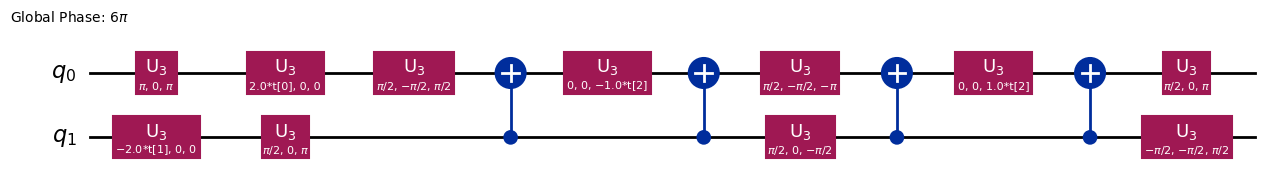

In [103]:
from qiskit import transpile

# Decompose UCCSD ansatz into basis gates (CNOTs, Rz, Rx, etc.)
decomposed_ansatz = transpile(ansatz, basis_gates=['u3', 'cx'])

# Draw the decomposed circuit
decomposed_ansatz.draw("mpl")

# VQE but expanded

Gonna use Estimator with a bunch of angles.

https://qiskit-community.github.io/qiskit-algorithms/_modules/qiskit_algorithms/minimum_eigensolvers/vqe.html#VQE

[A variational eigenvalue solver on a quantum processor (2013)](https://arxiv.org/abs/1304.3061)

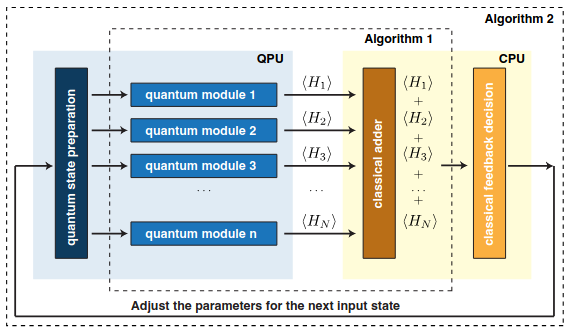

We start with $\ket{\psi_0}=\ket{HF}$ state ("qubitized" lowest energy shell fill) and [0, 0, 0] parameters. Then run through the circuit and prepare $\ket{\psi_1}$ state. Then some magic happens, including calculating expval in hamiltonian basis, and we get some updated parameters [t0, t1, t2]. Then repeat the process with updated parameters and idk what state.

### On AER simulator

Optimal Parameters: [-6.03851523e-08 -3.62171864e-08 -1.11768490e-01]
Ground State Energy: -1.857275030202373


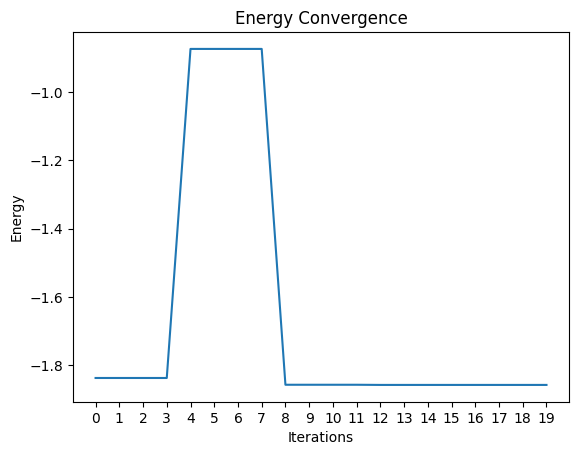

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.primitives import Estimator
from qiskit_algorithms.optimizers import L_BFGS_B
from qiskit.quantum_info import SparsePauliOp

initial_point = np.zeros(ansatz.num_parameters)

results = []

# Function to estimate energy
def estimate_energy(parameters):
    job = estimator.run([ansatz], [qubit_hamiltonian], [parameters])
    result = job.result()
    results.append(result.values[0])
    return result.values[0]

# Run optimization
result = optimizer.minimize(fun=estimate_energy, x0=initial_point)

# Print results
print("Optimal Parameters:", result.x)
print("Ground State Energy:", result.fun)

# Plot the energy convergence
plt.plot(results)
plt.xlabel('Iterations')
plt.xticks(range(len(results)))
plt.ylabel('Energy')
plt.title('Energy Convergence')
plt.show()

# Modifications

orbitals:  6
particles:  (2, 2)


QUBIT HAMILTONIAN: 

SparsePauliOp(['IIIIIIIIII', 'IIIIIIIIIZ', 'IIIIIIIIZX', 'IIIIIIIIIX', 'IIIIIIIZXX', 'IIIIIIIIYY', 'IIIIIXXXXX', 'IIIIIYXXXY', 'IIIIIIIIZZ', 'IIIIIIIZXZ', 'IIIIIIIIXI', 'IIIIIXXXXZ', 'IIIIIYXXYI', 'IIIIIIIZZI', 'IIIIIXXXZI', 'IIIIIYXYII', 'IIIIIIZZII', 'IIIIIZZIII', 'IIIIIZIIII', 'IIIIZIIIII', 'IIIZXIIIII', 'IIIIXIIIII', 'IIZXXIIIII', 'IIIYYIIIII', 'XXXXXIIIII', 'YXXXYIIIII', 'IIIZZIIIII', 'IIZXZIIIII', 'IIIXIIIIII', 'XXXXZIIIII', 'YXXYIIIIII', 'IIZZIIIIII', 'XXXZIIIIII', 'YXYIIIIIII', 'IZZIIIIIII', 'ZZIIIIIIII', 'ZIIIIIIIII', 'IIIIIIIIZI', 'IIIIIIIZXI', 'IIIIIIIIXZ', 'IIIIIXXXXI', 'IIIIIYXXYZ', 'IIIIIIIZZZ', 'IIIIIXXXZZ', 'IIIIIYXYIZ', 'IIIIIIZZIZ', 'IIIIIZZIIZ', 'IIIIIZIIIZ', 'IIIIZIIIIZ', 'IIIZXIIIIZ', 'IIIIXIIIIZ', 'IIZXXIIIIZ', 'IIIYYIIIIZ', 'XXXXXIIIIZ', 'YXXXYIIIIZ', 'IIIZZIIIIZ', 'IIZXZIIIIZ', 'IIIXIIIIIZ', 'XXXXZIIIIZ', 'YXXYIIIIIZ', 'IIZZIIIIIZ', 'XXXZIIIIIZ', 'YXYIIIIIIZ', 'IZZIIIIIIZ', 'ZZIIIIIIIZ', 'ZIIIIIIIIZ', 'IIIII

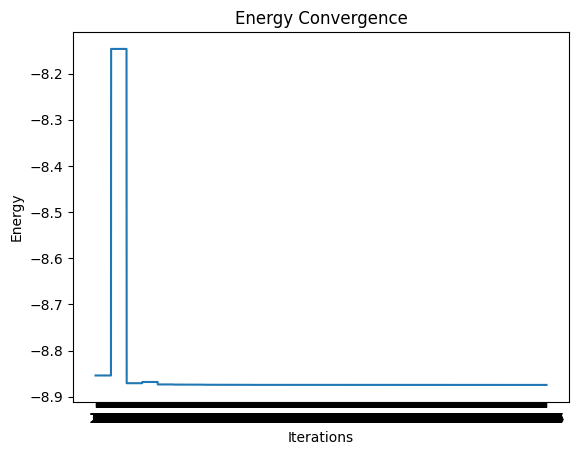

In [125]:
driver = PySCFDriver(
    atom="Li 0.0 0.0 0.0; H 0.0 0.0 1.6",
    unit=DistanceUnit.ANGSTROM,
    basis='sto3g',
)
problem = driver.run()

print("orbitals: ", problem.num_spatial_orbitals)
print("particles: ", problem.num_particles)

mapper = ParityMapper(num_particles=problem.num_particles)

qubit_hamiltonian = mapper.map(problem.hamiltonian.second_q_op())
print("\n\nQUBIT HAMILTONIAN: \n")
print(qubit_hamiltonian)

optimizer = L_BFGS_B()

ansatz = UCCSD(
    problem.num_spatial_orbitals,
    problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        problem.num_spatial_orbitals,
        problem.num_particles,
        mapper,
    ),
)

initial_point = np.zeros(ansatz.num_parameters)

results = []

def estimate_energy(parameters):
    job = estimator.run([ansatz], [qubit_hamiltonian], [parameters])
    result = job.result()
    results.append(result.values[0])
    print("Energy iteration: ", result.values[0])
    return result.values[0]

result = optimizer.minimize(fun=estimate_energy, x0=initial_point)

print("Optimal Parameters:", result.x)
print("Ground State Energy:", result.fun)

plt.plot(results)
plt.xlabel('Iterations')
plt.xticks(range(len(results)))
plt.ylabel('Energy')
plt.title('Energy Convergence')
plt.show()

orbitals:  2
particles:  (1, 1)


QUBIT HAMILTONIAN: 

SparsePauliOp(['II', 'IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XZ', 'ZX', 'XX'],
              coeffs=[-1.15238645+0.j,  0.86101241+0.j,  0.03046846+0.j, -0.86101241+0.j,
  0.03046846+0.j, -0.01925085+0.j,  0.03046846+0.j, -0.03046846+0.j,
  0.2276705 +0.j])
Energy iteration:  -2.8551604261544457
Energy iteration:  -2.8551604261544457
Energy iteration:  -2.8551604261544457
Energy iteration:  -2.855160421601033
Energy iteration:  -0.6235406163593331
Energy iteration:  -0.6235406153338007
Energy iteration:  -0.6235406153338001
Energy iteration:  -0.6235406495708751
Energy iteration:  -2.8697324605658996
Energy iteration:  -2.86973246049912
Energy iteration:  -2.8697324604991206
Energy iteration:  -2.869732459808351
Energy iteration:  -2.8701588501010704
Energy iteration:  -2.870158850065471
Energy iteration:  -2.8701588500654713
Energy iteration:  -2.8701588501035404
Energy iteration:  -2.8701615188130676
Energy iteration:  -2.870161518797648
E

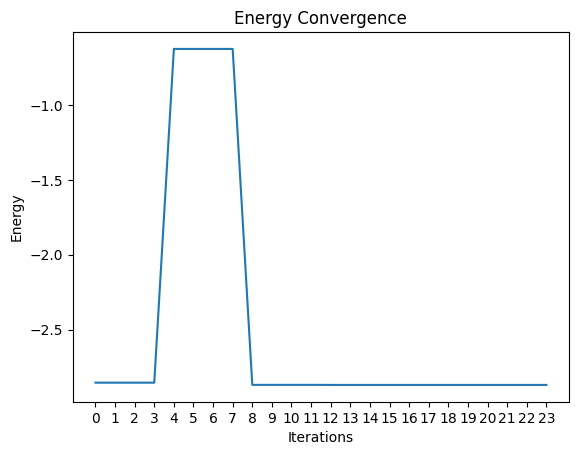

In [ ]:
driver = PySCFDriver(
    atom="He 0.0 0.0 0.0", 
    unit=DistanceUnit.ANGSTROM,
    basis='6-31G',
)
problem = driver.run()

print("orbitals: ", problem.num_spatial_orbitals)
print("particles: ", problem.num_particles)

mapper = ParityMapper(num_particles=problem.num_particles)

qubit_hamiltonian = mapper.map(problem.hamiltonian.second_q_op())
print("\n\nQUBIT HAMILTONIAN: \n")
print(qubit_hamiltonian)

optimizer = L_BFGS_B()

ansatz = UCCSD(
    problem.num_spatial_orbitals,
    problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        problem.num_spatial_orbitals,
        problem.num_particles,
        mapper,
    ),
)

initial_point = np.zeros(ansatz.num_parameters)

results = []

def estimate_energy(parameters):
    job = estimator.run([ansatz], [qubit_hamiltonian], [parameters])
    result = job.result()
    results.append(result.values[0])
    print("Energy iteration: ", result.values[0])
    return result.values[0]

result = optimizer.minimize(fun=estimate_energy, x0=initial_point)

print("Optimal Parameters:", result.x)
print("Ground State Energy:", result.fun)

plt.plot(results)
plt.xlabel('Iterations')
plt.xticks(range(len(results)))
plt.ylabel('Energy')
plt.title('Energy Convergence')
plt.show()

orbitals:  2
particles:  (1, 1)


QUBIT HAMILTONIAN: 

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII', 'IIZZ', 'IZIZ', 'ZIIZ', 'YYYY', 'XXYY', 'YYXX', 'XXXX', 'IZZI', 'ZIZI', 'ZZII'],
              coeffs=[-0.81054798+0.j,  0.17218393+0.j, -0.22575349+0.j,  0.17218393+0.j,
 -0.22575349+0.j,  0.12091263+0.j,  0.16892754+0.j,  0.16614543+0.j,
  0.0452328 +0.j,  0.0452328 +0.j,  0.0452328 +0.j,  0.0452328 +0.j,
  0.16614543+0.j,  0.17464343+0.j,  0.12091263+0.j])
Energy iteration:  -1.8369679912029837
Energy iteration:  -1.8369679912029817
Energy iteration:  -1.836967991202982
Energy iteration:  -1.836967987584349
Energy iteration:  -0.8744126149293678
Energy iteration:  -0.8744126149293593
Energy iteration:  -0.8744126149293583
Energy iteration:  -0.8744126309089838
Energy iteration:  -1.856784953401953
Energy iteration:  -1.8567849534019552
Energy iteration:  -1.8567849534019532
Energy iteration:  -1.8567849528363565
Energy iteration:  -1.8572749841838398
Energy iteration:  -1.85

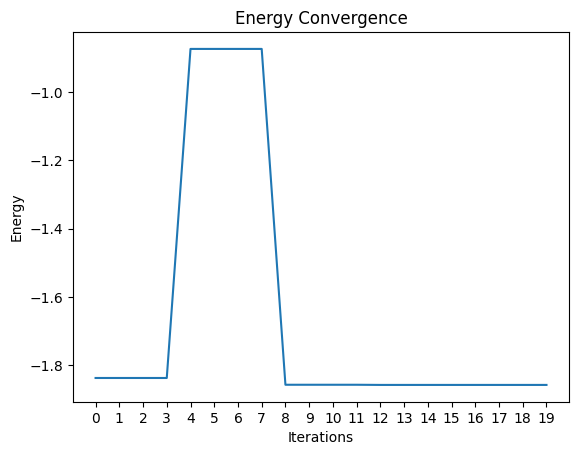

In [124]:
driver = PySCFDriver(
    atom='H .0 .0 .0; H .0 .0 0.735',
    unit=DistanceUnit.ANGSTROM,
    basis='sto3g',
)
problem = driver.run()

print("orbitals: ", problem.num_spatial_orbitals)
print("particles: ", problem.num_particles)

from qiskit_nature.second_q.mappers import JordanWignerMapper

mapper = JordanWignerMapper()

qubit_hamiltonian = mapper.map(problem.hamiltonian.second_q_op())
print("\n\nQUBIT HAMILTONIAN: \n")
print(qubit_hamiltonian)

optimizer = L_BFGS_B()

ansatz = UCCSD(
    problem.num_spatial_orbitals,
    problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        problem.num_spatial_orbitals,
        problem.num_particles,
        mapper,
    ),
)

initial_point = np.zeros(ansatz.num_parameters)

results = []

def estimate_energy(parameters):
    job = estimator.run([ansatz], [qubit_hamiltonian], [parameters])
    result = job.result()
    results.append(result.values[0])
    print("Energy iteration: ", result.values[0])
    return result.values[0]

result = optimizer.minimize(fun=estimate_energy, x0=initial_point)

print("Optimal Parameters:", result.x)
print("Ground State Energy:", result.fun)

plt.plot(results)
plt.xlabel('Iterations')
plt.xticks(range(len(results)))
plt.ylabel('Energy')
plt.title('Energy Convergence')
plt.show()